# Linear Regression & Gradient Descent
**1. Project Overview:**

   (a) To work on multi-linear regression methodology of batch gradient descent without feature selection and regularization (penalty/weight-decay)

**2. Dataset:** 

Boston Housing Data

**3. Sources:**

   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
                
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
                 
   (c) Date: July 7, 1993
   
**4. Number of Attributes:**

13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

**5. Attribute Information:**

| Index | Column | Description |
| :-- | :-- | :-- |
|1. | CRIM | per capita crime rate by town |
|2. | ZN | proportion of residential land zoned for lots over 25,000 sq.ft. |
|3. | INDUS | proportion of non-retail business acres per town |
|4. | CHAS | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
|5. | NOX | nitric oxides concentration (parts per 10 million) |
|6. | RM | average number of rooms per dwelling |
|7. | AGE | proportion of owner-occupied units built prior to 1940 |
|8. | DIS | weighted distances to five Boston employment centres |
|9. | RAD | index of accessibility to radial highways |
|10. | TAX | full-value property-tax rate per \$10,000 |
|11. | PTRATIO | pupil-teacher ratio by town |
|12. | B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
|13. | LSTAT | % lower status of the population |
|14. | MEDV | Median value of owner-occupied homes in \$1000's |

## 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
%matplotlib inline

## 2. Importing Dataset

Importing Boston Housing Dataset

In [2]:
# Generate header / column names
header_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
      "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

# Import dataset as pd.dataframe
df = pd.read_csv("data/housing.data", sep = "\s+", names = header_names, engine = "python")

In [3]:
# Check import with first 5 rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

## 3. Basic Checks on Data

- Data Types
- Check for Nulls
- Numerical Values

In [5]:
# Check datatype & counts
df.info() # Length of 506 rows with 14 columns, all numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Check for nulls
df.isnull().sum().sort_values(ascending = False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations from df.describe()**

- Normalization is required since all categories except `CHAS` are not between [0:1]
- `LSTAT`, `INDUS`, `ZN`, `AGE` represents % or proportion in numerical value. Thus can be applied with $N / 100$ to convert into percentage in decimal

In [8]:
# Data Transformation - Converting percentage or proportion to decimal
to_convert = ["LSTAT", "INDUS", "ZN", "AGE"]
df[to_convert] = df[to_convert] / 100

In [9]:
# Check if conversion has taken place
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,0.113636,0.233225,0.00000,0.000000,0.00000,0.125000,1.0000
INDUS,506.0,0.111368,0.068604,0.00460,0.051900,0.09690,0.181000,0.2774
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,0.685749,0.281489,0.02900,0.450250,0.77500,0.940750,1.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## 3. Defining our Multi-Linear Equation

Before we start diving into the EDA or building the model for our multi-linear equation. We can first define the existing equation in the form of $y = Mx + C$ with our dependent and independent variables from our dataset.

$ MEDV = \beta_0 + \beta_1 CRIM + \beta_2 ZN + \beta_3 INDUS + \beta_4 CHAS + \beta_5 NOX + 
\beta_6 RM + \beta_7 AGE + \beta_8 DIS + \beta_9 TAX + \beta_{10} PTRATIO + \beta_{11} B +
\beta_{12} LSTAT$

**The parameters for the multi-linear equation are:**

- Weights
- Intercept
- predictor/dependent variable
- Independent variables/features

**The hyperparameters for our multi-linear equation are:**

- Epoch (Iterations)
- Learning Rate ($\alpha$)

## 4. EDA

- Correlation Matrix (Heatmap)
- Visualisation of top 5 attributes

<AxesSubplot:>

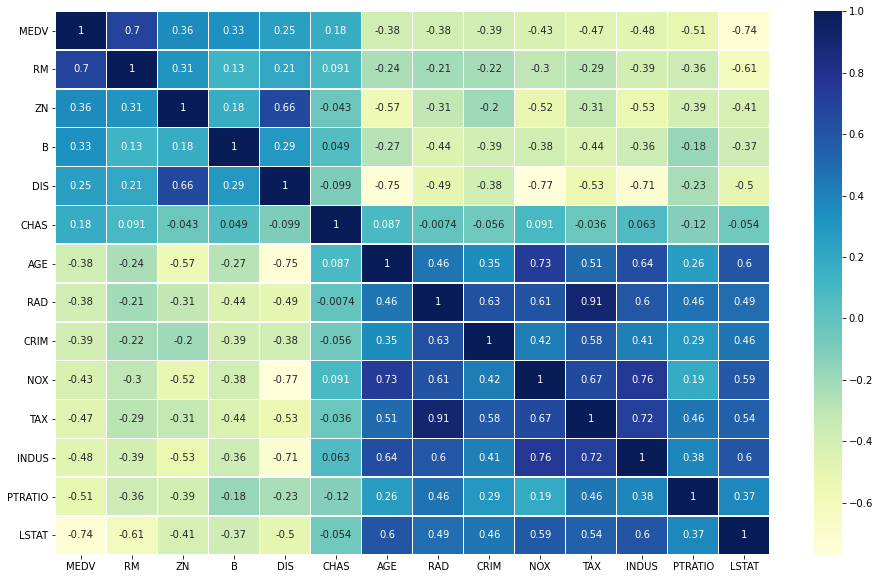

In [10]:
# Reviewing the heat map to select 5 correlated attributes for EDA
cor_df = df.corr()                          # correlation of all attributes in df
k = 14                                      # Total number of attributes/features

# Sorting the columns by largest `MEDV` & extracting index
cols = cor_df.nlargest(k, "MEDV")["MEDV"]
cols_index = cols.index

# Setting figure & plotting
f, ax = plt.subplots(figsize = (16,10))     # Size of the figure

sns.heatmap(df[cols_index].corr(), annot = True, linewidths = .5,
           cmap = "YlGnBu")

In [11]:
# Print out correlation wrt `MEDV`
cols

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

**Observations:**

- From our heat-map and object `cols`, we can observe that the top 5 correlated values are `RM`, `LSTAT`, `PTRATIO`, `INDUS`, and `TAX` 

<Figure size 1440x1440 with 0 Axes>

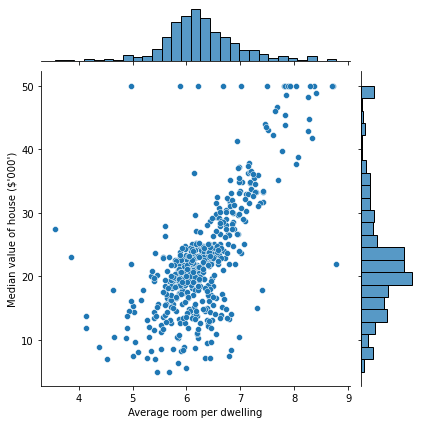

In [12]:
# RM - Average number of room per dwelling (House)
plt.figure(figsize = (20, 20))     # Size of the figure

ax = sns.jointplot(x = df.RM, y = df.MEDV)
ax.set_axis_labels("Average room per dwelling", "Median value of house ($'000')")

# We can see that there is some linear pattern that as number of rooms in house increases,
# the price generally increases as well

<Figure size 1440x1440 with 0 Axes>

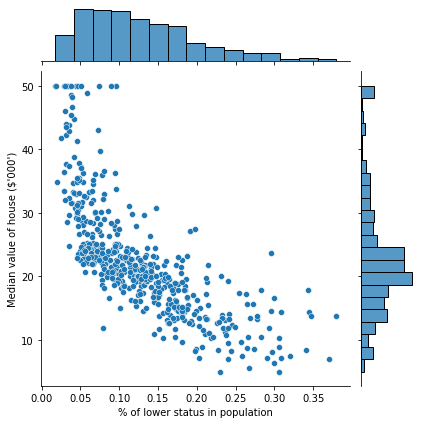

In [13]:
# LSTAT - % of lower status in the population
plt.figure(figsize = (20, 20))     # Size of the figure

ax = sns.jointplot(x = df.LSTAT, y = df.MEDV)
ax.set_axis_labels("% of lower status in population", "Median value of house ($'000')")

# We can see there as the population has lesser lower status, the price increases
# Houses with highest values has < 10% lower status in their population

<Figure size 1440x1440 with 0 Axes>

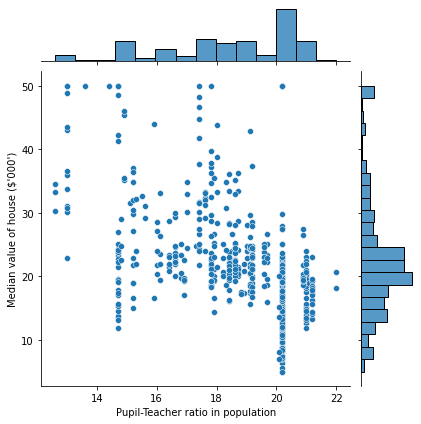

In [14]:
# PTRATIO - Ratio of pupil to teacher in population
plt.figure(figsize = (20, 20))     # Size of the figure

ax = sns.jointplot(x = df.PTRATIO, y = df.MEDV)
ax.set_axis_labels("Pupil-Teacher ratio in population", "Median value of house ($'000')")

# There is some form of linear relationship
# Generally the higher valued houses have a lesser P-T ratio
# While the lower valued houses (<$10,000) have a higher P-T ratio, generally above 20

<Figure size 1440x1440 with 0 Axes>

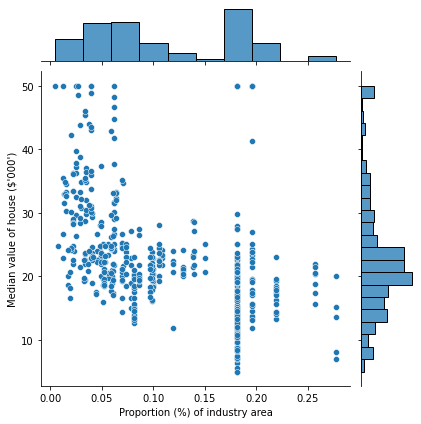

In [15]:
# INDUS - Proportion of non-industry business (industry) in area

plt.figure(figsize = (20, 20))     # Size of the figure

ax = sns.jointplot(x = df.INDUS, y = df.MEDV)
ax.set_axis_labels("Proportion (%) of industry area", "Median value of house ($'000')")

# Generally the lesser the proportion of industry area, the higher the value
# Not always true

<Figure size 1440x1440 with 0 Axes>

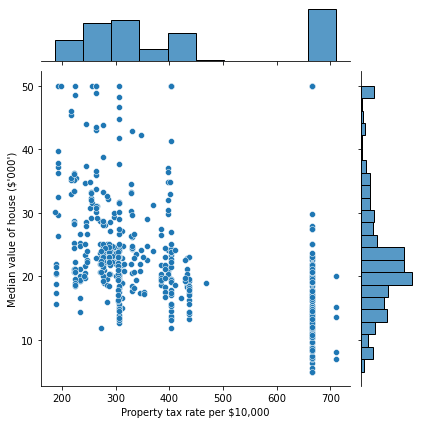

In [16]:
# TAX - Property tax rate per $10,000

plt.figure(figsize = (20, 20))     # Size of the figure

ax = sns.jointplot(x = df.TAX, y = df.MEDV)
ax.set_axis_labels("Property tax rate per $10,000", "Median value of house ($'000')")

# Curious - while there is no general trend on high-valued houses
# The tax rate on houses with lower-value seems to be quite high

## 5. Helper Functions: RMSE, R2 Score, Gradient Descent and Predict

From our linear equation specified in part 2 earlier, once we predicted 

- Root Mean Square Error (RMSE): The std dev. measure of how spread out our resuduals (error) are 
- $R^2$ Score: Coefficient of determination which provides insights to the model's goodness of fit.
    - $R^2$ = 0, No values are accounted for
    - $R^2$ = 1, perfect fit
- Gradient Descent: An optimization algorithm to find the optimized coefficients machine learning models, making changes to the model towards the minimum error value
- Predict: Function to use model weights & intercept to predict actual value

In [17]:
# Root Mean Square Error function
def RMSE(y_true, y_pred):
    result = 0
    
    # Sum of squared difference between actual value of true_y & predicted value of pred_y
    squared_sum = 0
    for i in range(len(y_true)):
        squared_sum += (y_true[i] - y_pred[i]) ** 2
    
    # Mean of MSE
    mean_square = squared_sum / len(y_true)
    
    # Root of MSE (RMSE)
    result = math.sqrt(mean_square)
    return result

In [18]:
# R^2 Score function
def r2_score(y_true, y_pred):
    r2 = 1
    
    # Define value for sum squared regression (SSR) and total sum of squares (SST)
    y_bar = np.mean(y_true)
    ssr = 0
    sst = 0
    
    for i in range(len(y_true)):
        ssr += (y_true[i] - y_pred[i]) ** 2
        sst += (y_true[i] - y_bar) ** 2
        
    # r2 score
    r2 = r2 - (ssr / sst)
    return r2

In [19]:
# Testing RMSE & r2_score function
xt = [1.0, 2.0, 3.0, 4.0, 5.0]
xp = [1.1, 2.3, 3.2, 4.3, 5.0]

print(RMSE(xt, xp))
print(r2_score(xt, xp))

0.2144761058952721
0.977


As we have a total of 13 independent variables, our function has to be based on batch gradient descent. 

The batch gradient descent takes into consideration of all training data at every step to update the parameters. 

**Steps to our Batch Gradient Descent:**
- Step 1:
    - Initialize weight (w) & bias / intercept (b)
    - For batch, since we are dealing with multiple weights. It can be in the form of a list/array.
- Step 2: 
    - Set a value for learning rate ($\alpha$) and iterations/epochs (epochs)
    - We will use a common default value of 0.001 for learning rate, optional variable as `lr`
    - Defauly value of 1000 for epochs, optional variable `e`
- Step 3:
   - Scale the data if they are on a different scale, since we have `dataNorm()` function earlier, we won't need to scale our data in our function
- Step 4:
    - For every iteration, take the partial derivative of the cost function with relation to (w.r.t) the `w` and `b` parameter.
    - $w = w - \alpha * \nabla _wJ(w)$
    - $b = w - \alpha * \nabla _bJ(b)$
- Step 5:
    - Reiterate step 4 until the cost function converges
    - Return the sweet spot for weight and bias


In [20]:
# Gradient Descent function
def gradient_descent(x_train, y_train, lr = 0.001, e = 1000):
    # Set intercept, weight & create list to store loss
    np.random.seed(123)                     # Set seed for reproductivity
    intercept = 0
    weight_vec = np.ones(x_train.shape[1])  # Create a vector of 1s of same column count of training set
    loss_lst = []
    
    # Helper function to predict y-value
    def y_prediction(training, weight_vec, intercept):
        lst = []
        # y = Mx + C
        for i in range(len(training)):
            # Tabulate y = Mx + C for every column
            lst.append(np.dot(training[i], weight_vec) + intercept)
        return np.array(lst)
    
    # Helper function to calculate loss - for plotting
    def loss(y_true, y_predicted):
        result = 0
        for i in range(len(y_true)):
            # Sum of squared differences
            result += (y_true[i] - y_predicted[i]) ** 2
        result = (2 / len(y_true)) * result
        return result
    
    # Helper function to calculate derivative of loss w.r.t weights (D_m)
    def dw(training, y_true, y_predicted):
        dw_val = 0
        for i in range(len(y_true)):
            dw_val += training[i] * (y_true[i] - y_predicted[i])
        dw_val = (-2 / len(y_true)) * dw_val
        return dw_val
    
    # Helper function to calculate derivative of loss w.r.t bias/intercept (D_w)
    def db(y_true, y_predicted):
        db_val = 0
        for i in range(len(y_true)):
            db_val += y_true[i] - y_predicted[i]
        db_val = (-2 / len(y_true)) * db_val
        return db_val
    
    # Apply gradient descent & iterate till end of epochs
    for i in range(e):
        # Predict y_values with existing weights & intercept
        y_predicted = y_prediction(x_train, weight_vec, intercept)
        
        # Update values for weights & intercept
        weight_vec = weight_vec - lr * dw(x_train, y_train, y_predicted)
        intercept = intercept - lr * db(y_train, y_predicted)
        
        # Append loss/cost to list for plotting
        loss_lst.append(loss(y_train, y_predicted))
        
    # Plot loss vs. Iterations
    plt.plot(np.arange(1, e), loss_lst[1:])
    plt.xlabel("Number of iterations (epochs)")
    plt.ylabel("Loss")
                
    
    return [weight_vec, intercept]

## 6. Data Processing

- Data Transformation: pd.dataframe to np.array
- Data Normalization: Min-Max Normalization on all dependent variables
- Train-and-Test Split: Splitting data for model building and testing

In [22]:
# Data Transformation - dataframe to array
data = df.to_numpy()

In [23]:
# Check shape of new array to ensure conversion is proper
data.shape

(506, 14)

In [24]:
# Check on datatype
data.dtype

dtype('float64')

In [25]:
# Checking column storing independent variable
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [26]:
# Print first 5 values of column MEDV / col 14
df[["MEDV"]].head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [27]:
# Print first 5 values of column 14 of array
data[:5, -1]  # rows 0:4, column 14 / last column

array([24. , 21.6, 34.7, 33.4, 36.2])

In [28]:
# Function for min-max normalization
def dataNorm(my_array):
    """
    dataNorm takes in an array and performs max-min normalization across all features within the range of [0:1]
    
    Input:
        - numpy array
    Output:
        - numpy array with normalized values
    Formula for mix-max normalization:
        ( row[i] - min(column) ) / ( (max(column) - min(column) ) 
    """
    # Duplicate array into result array
    result = my_array.copy()

    # Obtaining a list of all min, max values for each column
    minmax = []                             # Empty list to store values of every column
    for i in range(len(result[0]) - 1):     # Iterate through all independent variables (Columns)
        temp = []
        for row in result:                  # Iterate through all rows (rows)
            temp.append(row[i])             # Append values of row in temp list

        min_val = min(temp)                 # Obtain minimal value for column[i]
        max_val = max(temp)                 # Obtain maximum value for column[i]
        minmax.append([min_val, max_val])


    # Normalizing all attributes of dataset across each row
    for row in result:                      # Iterating through every row (record) in array
        for i in range(len(row) - 1):       # For every independent value in the row (columns)
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

    # Output: Normalized array
    return result

In [29]:
data_n = dataNorm(data)

In [30]:
# Check shape of normalized data
data_n.shape

(506, 14)

In [31]:
# Function to split data into training and testing sets based on precentage
def splitTT(norm_array, percent):
    """
    Perform a percentage split split based on preferred precentage provided in decimal [0.0 - 0.1] on provided array and returns 2 arrays, x_train and x_test

    Input:
        - norm_array: Array provided for splitting into training and testing arrays
        - precent_splt: Float value between range of [0 - 1] which denotes the percentage of split for the training dataset
    Output:
        - X_split: A list containing two (2) arrays, [train_set, test_set]
    """
    # Create list to store results
    X_split = []

    # Set random seed to ensure reproducitivity
    np.random.seed(123)

    # Generate copy of array and shuffle dataset
    x_copy = norm_array.copy()
    np.random.shuffle(x_copy)        # Shuffling the rows within array

    # Tabulate indexes for splitting
    train_index = round(len(norm_array) * percent)

    # Create & splitted datasets
    train_set = norm_array[:train_index].copy()
    test_set = norm_array[train_index:].copy()
    X_split.append(train_set)
    X_split.append(test_set)

    return X_split

In [32]:
# Split data into 90% for training and 10% for testing
data_split = splitTT(data_n, 0.9)
train = data_split[0]
test = data_split[1]

In [33]:
# Check size of train and test data
print(f"Size of data before split: {len(data_n)}\nSize of Train and Test: {len(train) + len(test)}")

Size of data before split: 506
Size of Train and Test: 506


In [34]:
# Separation of y_label from both test and training set
x_train = train[:, :-1]
y_train = train[:,-1]
x_test = test[:, :-1]
y_test = test[:, -1]

In [35]:
# Confirm length are aligned
print(f"length of training set - x: {len(x_train)}, y: {len(y_train)}\n"
     f"length of testing set - x: {len(x_test)}, y: {len(y_test)}")

length of training set - x: 455, y: 455
length of testing set - x: 51, y: 51


## 7. Modeling & Optimization

- Defining hyperparameters: Defining different values of epochs and learning rate ($\alpha$)
- Modeling: Building models with different hyperparameters
- Optimization: Plotting and comparing models to find the best hyperparameters to select optimized model
- Evaluation: Evaluating selected model based on RMSE and $R^2$ Score

In [36]:
# Defining hyperparameter for learning rate
lr_lst = [0.001, 0.003, 0.01, 0.03, 0.1]

In [37]:
# Defining a list to store the results
result_lst = []

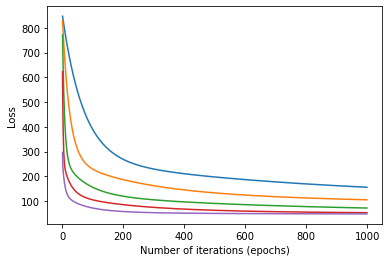

In [38]:
# Testing gradient descent function with range of learning rate while epoch is kept at 1,000

for idx in range(len(lr_lst)):
    result_lst.append(gradient_descent(x_train, y_train, lr = lr_lst[idx]))

**Observations:**

- From our graph we can see that learning rate of 0.03 and 0.1 seems to flaatens out well with least error after 600 epioch
- Thus, we can select the learning rate ($\alpha$) of 0.03 and 0.1 and reduce the epoich to determine the values that we should work

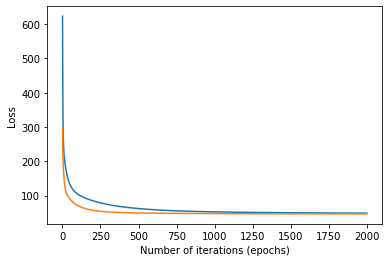

In [39]:
# Prepare preferred learning rate & test increasing epoichs to 2000
e2000 = [[0.03, 2000, 0, 0],
         [0.1, 2000, 0, 0]]

for idx in range(len(e2000)):
    temp = gradient_descent(x_train, y_train, lr = e2000[idx][0], e = e2000[idx][1])
    e2000[idx][2] = temp[0]
    e2000[idx][3] = temp[1]

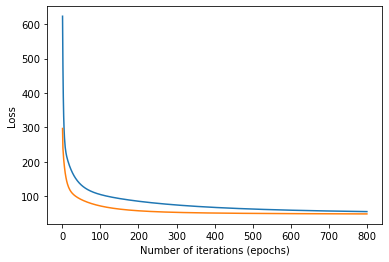

In [40]:
# Prepare preferred learning rate & test reducing epoichs to 800
e800 = [[0.03, 800, 0, 0],
         [0.1, 800, 0, 0]]

for idx in range(len(e800)):
    temp = gradient_descent(x_train, y_train, lr = e800[idx][0], e = e800[idx][1])
    e800[idx][2] = temp[0]
    e800[idx][3] = temp[1]

**Observations:**

- Juding from the plots, we would go with `epoch value of 2000` and to evaulate the 2 models with the predicted values to determine which are the better value of weight and intercept to go with

In [41]:
# Extract weight and bias from e2000
w = []
b = []
for i in range(len(e2000)):
    w.append(e2000[i][2])
    b.append(e2000[i][3])

In [42]:
# Helper function to predict values
def predict(x_test, y_test, w, b):
    # List to store predicted results
    y_predicted_lst = []
    
    # Predict y_value
    correct_counter = 0
    for i in range(len(x_test)):
        y_predicted_lst.append(np.dot(w, x_test[i]) + b)
        
        # Update counter if predicted_label = true_label
        if y_predicted_lst[i] == y_test[i]:
            correct_counter += 1
    
    # Tabulate RMSE
    rmse = 0
    rmse = RMSE(y_test, y_predicted_lst)
    
    # Tabulate r2 score
    r2 = 0
    r2 = r2_score(y_test, y_predicted_lst)
    
    return y_predicted_lst, rmse, r2

In [43]:
# Predicting models & obtaining the results
y_predicted = []
rmse = []
r2 = []

for i in range(len(w)):
    pred, mse, r = predict(x_test, y_test, w[i], b[i])
    
    y_predicted.append(pred)
    rmse.append(mse)
    r2.append(r)
    
    # print the details
    print(f"Model {i+1}\n"
          f"Formula: Y = {w[i]}x + {b[i]}\n"
          f"RMSE: {mse}\n"
          f"R2-Score: {r}\n")

Model 1
Formula: Y = [ -3.66771042   3.23022684   0.09292241   2.85682741  -3.9448588
  24.79011026   1.74650106  -8.13725389   4.41524604  -4.55042474
  -7.22526901   5.70474194 -18.49566268]x + 16.51980157092071
RMSE: 3.320464483319449
R2-Score: 0.41724206485424964

Model 2
Formula: Y = [ -7.57854493   4.46513266   0.99338924   2.56506522  -7.59756723
  22.05332272   1.07124046 -13.99481565   7.2934927   -7.30129588
  -8.14949176   4.39566137 -19.38439503]x + 22.933912723012504
RMSE: 3.286214013018149
R2-Score: 0.4292023140836919



**Observation:**

- From the comparison of using lr = 0.03 and 0.1 with epoch of 2000. We can see that lr = 0.1 has a slightly lower RMSE and higher R2 score, additionally, the higher lr will also means shorter running time.
- Thus we can decide to finalize our hyperparameters of $\alpha$ and epoch at `0.1` and `2000` respectively

For our Training set, we obtained the following output
Training RMSE: 4.830318959866563
Training R2 Score: 0.7406028995305548

For our Testing set, we obtained the following output
Testing RMSE: 3.286214013018149
Testing R2 Score: 0.4292023140836919



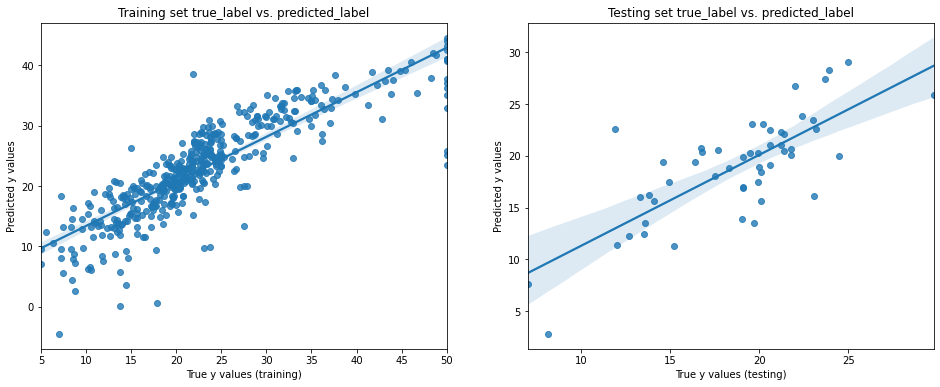

In [44]:
# Obtaining y_train and y_test predicted y from models with weights & intercept from e = 2000 & lr = 0.01
y_train_predicted, y_train_rmse, y_train_r2 = predict(x_train, y_train, w[1], b[1])
y_test_predicted, y_test_rmse, y_test_r2 = predict(x_test, y_test, w[1], b[1])

# Plotting the graphs to compare y_true and predicted y_values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

# Plotting the graphs
ax1.set_title("Training set true_label vs. predicted_label")
ax1.set(xlabel = "True y values (training)", ylabel = "Predicted y values")
sns.regplot(x = y_train, y = y_train_predicted, ax = ax1)
print(f"For our Training set, we obtained the following output\n"
     f"Training RMSE: {y_train_rmse}\n"
     f"Training R2 Score: {y_train_r2}\n")

ax2.set_title("Testing set true_label vs. predicted_label")
ax2.set(xlabel = "True y values (testing)", ylabel = "Predicted y values")
sns.regplot(x = y_test, y = y_test_predicted, ax = ax2)
print(f"For our Testing set, we obtained the following output\n"
     f"Testing RMSE: {y_test_rmse}\n"
     f"Testing R2 Score: {y_test_r2}\n")

**Observations:**

- Comparing our true to predicted values from our selected hyperparameters of `0.1` $\alpha$ and `epoch of 2000`, we can see that our model for training set has a smaller variance while our model for testing set has a larger variance.

## 8. Evaluation & Comparison

- Importing sklearn for linearRegression
- Comparing model accuracy between bulit vs. sklearn models

In [45]:
X_train = x_train
#y_train = ???
X_test = x_test
#y_test = ???

reg = LinearRegression().fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
print("Model 1: Training Set")
print("\nTrain RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3))
print("\nTrain R2 using sklearn linear regression model:",
round(r2_score(y_train, y_pred_train),3))

y_pred_test = reg.predict(X_test)
print("Model 2: Testing Set")
print("\nTest RMSE using sklearn linear regression model:",
round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3))
print("\nTest R2 using sklearn linear regression model:",
round(r2_score(y_test, y_pred_test),3))

Model 1: Training Set

Train RMSE using sklearn linear regression model: 4.82

Train R2 using sklearn linear regression model: 0.742
Model 2: Testing Set

Test RMSE using sklearn linear regression model: 3.287

Test R2 using sklearn linear regression model: 0.429


In [50]:
# Final Comparison

print(f"Model prediction on Training set\n"
     f"sklearn LR RMSE: {round(np.sqrt(mean_squared_error(y_train, y_pred_train)),3)} vs. manual GD RMSE: {y_train_rmse:.2f}\n"
     f"sklearn LR r2_score: {round(r2_score(y_train, y_pred_train),3)} vs. manual GD r2_score: {y_train_r2:.3f}\n")

print(f"Model prediction on Testing set\n"
     f"sklearn LR RMSE: {round(np.sqrt(mean_squared_error(y_test, y_pred_test)),3)} vs. manual GD RMSE: {y_test_rmse:.2f}\n"
     f"sklearn LR r2_score: {round(r2_score(y_test, y_pred_test),3)} vs. manual GD r2_score: {y_test_r2:.3f}\n")

Model 1: Training set
sklearn LR RMSE: 4.82 vs. manual GD RMSE: 4.83
sklearn LR r2_score: 0.742 vs. manual GD r2_score: 0.741

Model 2: Testing set
sklearn LR RMSE: 3.287 vs. manual GD RMSE: 3.29
sklearn LR r2_score: 0.429 vs. manual GD r2_score: 0.429



**Conclusion:**

- Our manual batch gradient descent and selection of hyperparameters resulted in a model that have came closed to the SKLearn linear regression in-built function for the boston housing dataset
- We can state that with the similar RMSE and $R^2$-Score, both the in-built function and our manual batch gradient descent function (linear regression) is able to decently predict the values
- Based on the RMSE and $R^2$-Score difference between the training and testing sets, there is a possibility that either our model is overfitted or that there is a poor distribution of training and testing dataset.